In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
import numpy as np

In [ ]:
#Some code from NLTK.ORG

from urllib import request #import some library
import nltk, re, pprint
from nltk import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
import scipy


# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Load the file
file = 'text8.txt'
with open(file, 'r') as f:
    textBad = f.read()

type(textBad) #what is the type of the variable
print(len(textBad)) #what is the length of the text file, number of words

textBad = clean_text(textBad) #clean the text

tokens = word_tokenize(textBad)
type(tokens)
print(len(tokens))
print(tokens[:10])
text = nltk.Text(tokens) #https://www.nltk.org/api/nltk.text.Text.html
print(type(text))
print(text[1024:1062])
print(text.collocations()) #https://www.nltk.org/api/nltk.collocations.html

#Let's build a vocabulary.
words = [w.lower() for w in tokens]
print(type(words))
vocab = sorted(set(words))
print(type(vocab))
print(len(vocab))

#https://www.geeksforgeeks.org/co-occurence-matrix-in-nlp/
#Let's build cooccurrence counts
window_size = 2 #How many words in sequence to consider to be in the window
# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))
# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix
print(co_matrix_df)

#Convert the above matrix to sparse representation, saves memory
print(scipy.sparse.csr_matrix(co_matrix_df))


In [ ]:
from urllib import request  # import some library
import nltk, re, pprint
from nltk import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
from scipy.sparse import lil_matrix, csr_matrix

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')

# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Load the file
file = 'text8.txt'
with open(file, 'r') as f:
    textBad = f.read()

# Clean the text
textBad = clean_text(textBad)

# Tokenize the text
tokens = word_tokenize(textBad)

# Build vocabulary
words = [w.lower() for w in tokens]
vocab = sorted(set(words))
print(f"Vocabulary size: {len(vocab)}")

# Create a sparse co-occurrence matrix using lil_matrix
window_size = 2  # How many words in sequence to consider in the window
word_index = {word: idx for idx, word in enumerate(vocab)}  # Word-to-index mapping
co_matrix_sparse = lil_matrix((len(vocab), len(vocab)), dtype=int)  # Sparse matrix

# Populate the sparse co-occurrence matrix
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_matrix_sparse[word_index[word], word_index[words[j]]] += 1

# Convert to CSR format for efficiency
co_matrix_sparse = csr_matrix(co_matrix_sparse)
print(f"Sparse co-occurrence matrix shape: {co_matrix_sparse.shape}")
print(f"Non-zero elements: {co_matrix_sparse.nnz}")

# Optionally, convert back to a DataFrame (for small vocabularies only)
# co_matrix_df = pd.DataFrame(co_matrix_sparse.toarray(), index=vocab, columns=vocab)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 253849
Sparse co-occurrence matrix shape: (253849, 253849)
Non-zero elements: 14938623


MemoryError: Unable to allocate 480. GiB for an array with shape (253849, 253849) and data type int64

In [5]:
print(co_matrix_sparse)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14938623 stored elements and shape (253849, 253849)>
  Coords	Values
  (0, 0)	5674
  (0, 1)	30
  (0, 2)	4
  (0, 7)	1
  (0, 9)	1
  (0, 19)	1
  (0, 27)	1
  (0, 31)	1
  (0, 37)	2
  (0, 46)	1
  (0, 62)	1
  (0, 63)	1
  (0, 66)	1
  (0, 69)	2
  (0, 73)	2
  (0, 88)	3
  (0, 90)	1
  (0, 93)	3
  (0, 97)	3
  (0, 100)	1
  (0, 101)	1
  (0, 102)	1
  (0, 103)	2
  (0, 122)	1
  (0, 124)	1
  :	:
  (253842, 238299)	1
  (253843, 152573)	1
  (253843, 164432)	1
  (253843, 208823)	1
  (253843, 239149)	1
  (253844, 30926)	1
  (253844, 135076)	1
  (253844, 162491)	1
  (253844, 201640)	1
  (253845, 30926)	1
  (253845, 42140)	1
  (253845, 153144)	1
  (253845, 227970)	1
  (253846, 47350)	1
  (253846, 83791)	1
  (253846, 227970)	2
  (253847, 62584)	1
  (253847, 199655)	2
  (253847, 246192)	2
  (253847, 251866)	1
  (253847, 253847)	6
  (253848, 14303)	1
  (253848, 162491)	1
  (253848, 211550)	1
  (253848, 217777)	1


Clustering with k=20
Clustering with k=21
Clustering with k=22
Clustering with k=23
Clustering with k=24
Clustering with k=25
Clustering with k=26
Clustering with k=27
Clustering with k=28
Clustering with k=29


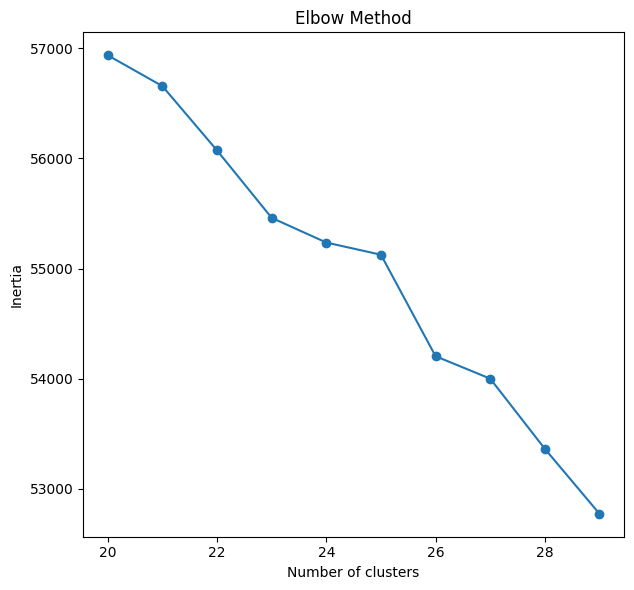

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Normalize the co-occurrence sparse matrix (row-wise)
normalized_matrix = normalize(co_matrix_sparse, norm='l2', axis=1)

# Step 2: Dimensionality reduction using Truncated SVD
# Reduce dimensions to 100 for computational efficiency
svd = TruncatedSVD(n_components=100, random_state=42)
reduced_matrix = svd.fit_transform(normalized_matrix)

# Step 3: Experiment with different numbers of clusters
k_values = range(2,30)
inertias = []
silhouette_scores = []

for k in k_values:
    print(f"Clustering with k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_matrix)
    labels = kmeans.labels_

    # Inertia (sum of squared distances to centroids)
    inertia = kmeans.inertia_
    # Silhouette score (how well the clusters are separated)
    # silhouette_score_ = silhouette_score(reduced_matrix, labels)

    inertias.append(inertia)
    # silhouette_scores.append(silhouette_score_)

# Step 4: Plot the elbow method and silhouette score
plt.figure(figsize=(12, 6))

# Elbow method plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# # Silhouette score plot
# plt.subplot(1, 2, 2)
# # plt.plot(k_values, silhouette_scores, marker='o')
# plt.title("Silhouette Score")
# plt.xlabel("Number of clusters")
# plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


In [45]:
reduced_matrix.shape

(253849, 100)

In [56]:
# K-means clustering
num_clusters = 30
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_matrix)

# Get cluster labels
labels = kmeans.labels_

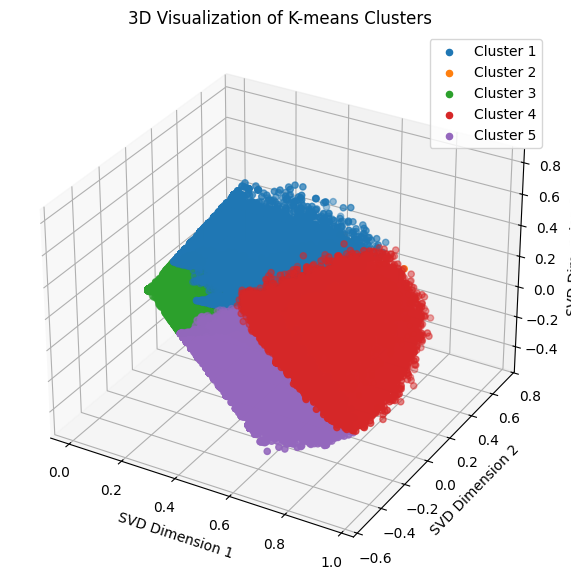

In [47]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce the data to 3 dimensions for 3D plotting
svd_3d = TruncatedSVD(n_components=3, random_state=42)
reduced_matrix_3d = svd_3d.fit_transform(reduced_matrix)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
for cluster in range(num_clusters):
    cluster_points = reduced_matrix_3d[labels == cluster]  # Filter points by cluster label
    ax.scatter(
        cluster_points[:, 0],  # x-coordinate
        cluster_points[:, 1],  # y-coordinate
        cluster_points[:, 2],  # z-coordinate
        label=f"Cluster {cluster + 1}",
        s=20  # marker size
    )

# Add titles and labels
ax.set_title("3D Visualization of K-means Clusters")
ax.set_xlabel("SVD Dimension 1")
ax.set_ylabel("SVD Dimension 2")
ax.set_zlabel("SVD Dimension 3")

plt.legend()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import plotly.io as pio

# Force Plotly to render in the browser
pio.renderers.default = "browser"

# Reduce the data to 3 dimensions for 3D plotting
svd_3d = TruncatedSVD(n_components=3, random_state=42)
reduced_matrix_3d = svd_3d.fit_transform(reduced_matrix)

# Prepare the data for Plotly
df = pd.DataFrame(reduced_matrix_3d, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
df['Cluster'] = labels  # Add cluster labels to the DataFrame

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df,
    x='Dimension 1',
    y='Dimension 2',
    z='Dimension 3',
    color=df['Cluster'].astype(str),  # Use clusters as colors
    title="Interactive 3D Visualization of K-means Clusters",
    labels={'color': 'Cluster'}
)

# Show the plot
fig.show()


In [54]:
%pip show nbformat

Name: nbformat
Version: 5.10.4
Summary: The Jupyter Notebook format
Home-page: https://jupyter.org
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior writte

In [21]:
saved_inertias = [82089.21366529468, 78267.92895908907, 73608.68711081463, 71526.26781570882,
69282.17457128322, 69158.06147031768, 66447.66271030916, 64140.727952074114,
62595.429548111286, 62129.47324313506, 61174.174430062354, 60385.462332601484,
59760.19351332465, 59136.19820243627, 58420.77080229804, 58145.76907437178,
57460.84065374461, 57270.823620953284, 56935.8607309163, 56655.8174268308,
56072.31059649466, 55460.16599635736, 55236.07026485737, 55125.35807121235,
54204.22152983712, 54000.64413029562, 53363.747157346384, 52773.993293817504]


In [22]:
print(saved_inertias)

[82089.21366529468, 78267.92895908907, 73608.68711081463, 71526.26781570882, 69282.17457128322, 69158.06147031768, 66447.66271030916, 64140.727952074114, 62595.429548111286, 62129.47324313506, 61174.174430062354, 60385.462332601484, 59760.19351332465, 59136.19820243627, 58420.77080229804, 58145.76907437178, 57460.84065374461, 57270.823620953284, 56935.8607309163, 56655.8174268308, 56072.31059649466, 55460.16599635736, 55236.07026485737, 55125.35807121235, 54204.22152983712, 54000.64413029562, 53363.747157346384, 52773.993293817504]


In [24]:
len(saved_inertias)

28

Text(0.5, 1.0, 'Elbow Method')

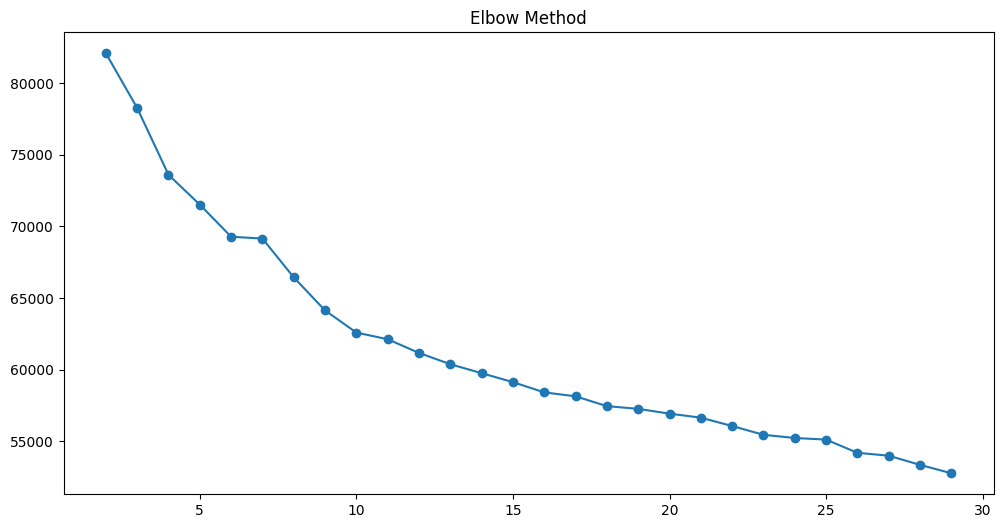

In [28]:
#Plot saved_inertias
plt.figure(figsize=(12, 6))
plt.plot(range(2,30), saved_inertias, marker='o')
plt.title("Elbow Method")

